## Smooth pursuit

In [2]:
# Require libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
from tsmoothie.smoother import LowessSmoother


In [3]:
# Function for pixel to degree conversion

# for stimulus
def px_deg_sti(data):
    time_sti = []
    pos_sti = []

    for y in data[1]:
        new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
        pos_sti.append(new_y)

    for x in range(1,len(pos_sti)+1):
        new_x = round((1/60)*x,4) # for monitor with screen refresh rate( 60 Hz)
        time_sti.append(new_x)
    return time_sti,pos_sti
    
# for eye
def px_deg_eye(data,dominant_eye):
    time_eye = []
    pos_eye = []
    if dominant_eye == 'right':
        for y in data['GazePointRightX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    elif dominant_eye == 'left':
        for y in data['GazePointLeftX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    for x in range(1,len(pos_eye)+1):
        new_x = round((1/300)*(x-900),4) # for tobii's eye tracker with 300 Hz sampling rate
        time_eye.append(new_x)
    return time_eye,pos_eye

In [4]:
# #load data_set
path = os.getcwd()
dirname = os.path.dirname(path)
# for PD ( 1deg/s)
option = ['URLStart','URLEnd']
data_path = dirname+"/data/subjects/PD/PDPW102/4_dps.xlsx"
data_pd  = pd.read_excel(data_path)#interpolate()
#data_eye_pd = data_pd[217:9301] # the end of first trial

sti_event = data_pd[data_pd['StudioEvent'].isin(option)].index # Caculating start and end of stimuli

data_eye_pd_first = data_pd[sti_event[0]+902:sti_event[0]+7804]
data_eye_pd_second = data_pd[sti_event[2]+902:sti_event[2]+7804]
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_first,'right')
one_deg_time_eye_second , one_deg_pos_eye_second =  px_deg_eye(data_eye_pd_first,'right')

# for stimulus (speed = 4deg/s, duration = 23 sec)
data_path = dirname+"/data/stimulus/4_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
four_deg_time_sti , four_deg_pos_sti =  px_deg_sti(data_sti)

KeyboardInterrupt: 

In [35]:
type(one_deg_time_eye_second)

list

In [36]:
df = pd.DataFrame(one_deg_time_eye , one_deg_pos_eye,index=['x','y'])

TypeError: __init__() got multiple values for argument 'index'

In [30]:
df

,0
-0.2419,0.0033
-0.3226,0.0067
-0.2218,0.0100
-0.4032,0.0133
-0.2419,0.0167
...,...
9.5363,22.9933
9.6774,22.9967
9.7984,23.0000
9.3952,23.0033


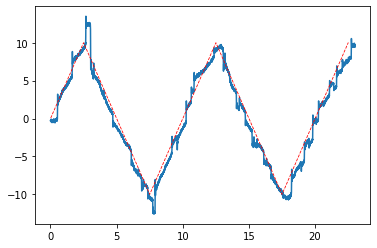

In [28]:
plt.plot(one_deg_time_eye , one_deg_pos_eye)
plt.plot(four_deg_time_sti , four_deg_pos_sti,'r--',linewidth=0.8,label='Stimulus Position')

### First Trial

In [26]:
# for eye ( 1deg/s)
data_path = dirname+"/data/PD001(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[148:29948] # the end of first trial
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for stimulus (speed = 1deg/s, duration = 90 sec)
data_path = dirname+"/data/stimulus/1_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
one_deg_time_sti , one_deg_pos_sti =  px_deg_sti(data_sti)


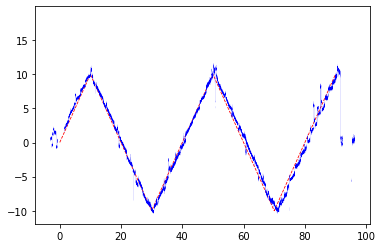

In [61]:
plt.plot(one_deg_time_sti , one_deg_pos_sti,'r--',linewidth=0.8,label='Stimulus Position')
plt.plot(one_deg_time_eye , one_deg_pos_eye,'b',linewidth=0.1,label='Eye Position')

### Second Trial

In [62]:
# for eye ( 1deg/s)
data_path = dirname+"/data/PD001(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[30057:59110] # the end of first trial
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')

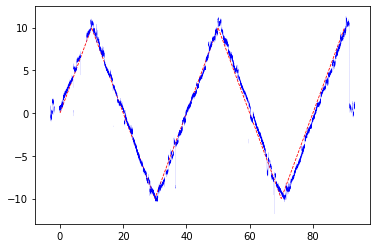

In [63]:
plt.plot(one_deg_time_sti , one_deg_pos_sti,'r--',linewidth=0.8,label='Stimulus Position')
plt.plot(one_deg_time_eye , one_deg_pos_eye,'b',linewidth=0.1,label='Eye Position')

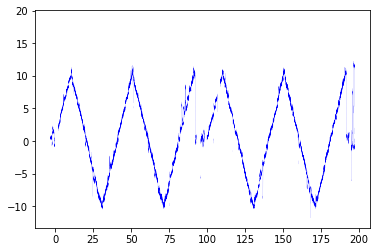

In [65]:
data_path = dirname+"/data/PD001(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')
plt.plot(one_deg_time_eye , one_deg_pos_eye,'b',linewidth=0.1,label='Eye Position')

## Scanpath creation

In [27]:
#load data_set
path = os.getcwd()
dirname = os.path.dirname(path)
# for eye ( 1deg/s)
data_path = dirname+"/data/PD001(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[148:29948] # the end of first trial

In [35]:
# for stimulus (speed = 1deg/s, duration = 90 sec)
data_path = dirname+"/data/stimulus/1_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
one_deg_time_sti , one_deg_pos_sti =  px_deg_sti(data_sti)

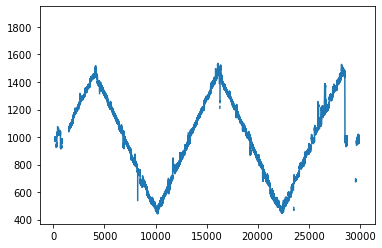

In [29]:
plt.plot(data_eye['GazePointRightX (ADCSpx)'])

In [5]:
data_eye[['LocalTimeStamp','GazePointRightX (ADCSpx)','GazePointRightY (ADCSpx)']]

,LocalTimeStamp,GazePointRightX (ADCSpx),GazePointRightY (ADCSpx)
0,11:41:08.406,985.0,651.0
1,11:41:08.409,989.0,639.0
2,11:41:08.413,NaN,NaN
3,11:41:08.416,973.0,647.0
4,11:41:08.420,983.0,638.0
...,...,...,...
27896,11:42:41.373,1397.0,497.0
27897,11:42:41.376,1405.0,518.0
27898,11:42:41.380,1407.0,517.0
27899,11:42:41.383,1406.0,511.0


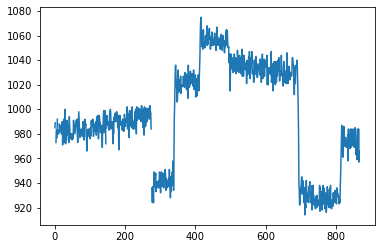

In [6]:
plt.plot(data_eye['GazePointRightX (ADCSpx)'][0:1500])

In [31]:
import PIL
from numpy import asarray
print("Pillow Version:",PIL.__version__)
image = Image.open('naruto.jpg')
print(image.format)
print(image.size)
print(image.mode)
data = asarray(image)
print(data)
print(data.shape)

Pillow Version: 8.4.0
JPEG
(900, 1440)
RGB
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 1  1  1]
  [24 24 24]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 5  5  5]
  [ 9  9  9]
  [21 21 21]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [34 34 34]
  [ 3  3  3]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
(1440, 900, 3)


In [7]:
#load data_set
path = os.getcwd()
dirname = os.path.dirname(path)
# for eye ( 1deg/s)
data_path = dirname+"/data/PDQE108(PD)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:27901] # the end of first trial

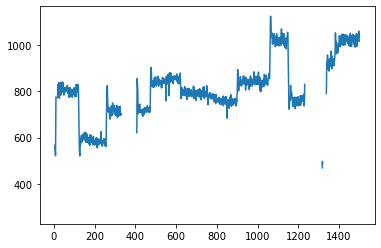

In [10]:
plt.plot(data_eye['GazePointRightX (ADCSpx)'][0:1500])

In [19]:
data_eye['GazePointRightX (ADCSpx)'][0:1500]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
1495    1045.0
1496    1032.0
1497    1061.0
1498    1022.0
1499    1018.0
Name: GazePointRightX (ADCSpx), Length: 1500, dtype: float64

In [18]:
from PIL import Image
import numpy as np
w, h = 512,512
data = data_eye['GazePointRightX (ADCSpx)'][0:1500]
# data[0:256, 0:256] = [255,0,0]
img = Image.fromarray(data, 'RGB')
img.show()

AttributeError: 'Series' object has no attribute '__array_interface__'

In [15]:
from scipy.misc import imshow
imshow(data)

ImportError: cannot import name 'imshow' from 'scipy.misc' (/Users/zaw/miniforge3/envs/data-science/lib/python3.9/site-packages/scipy/misc/__init__.py)

### For Healthy Control(HC) Subject no:PD001

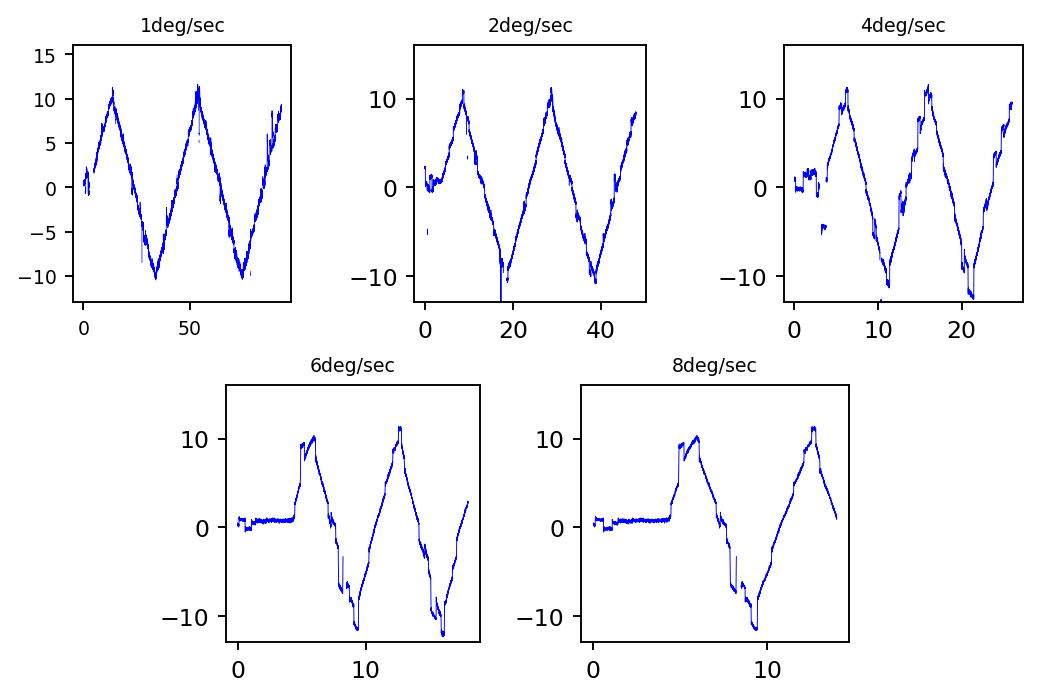

In [8]:
#load data_set
path = os.getcwd()
dirname = os.path.dirname(path)

# for stimulus (speed = 1deg/s, duration = 90 sec)
data_path = dirname+"/data/stimulus/1_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
one_deg_time_sti , one_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 2deg/s, duration = 45 sec)
data_path = dirname+"/data/stimulus/2_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
two_deg_time_sti , two_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 4deg/s, duration = 23 sec)
data_path = dirname+"/data/stimulus/4_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
four_deg_time_sti , four_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 6deg/s, duration = 15 sec)
data_path = dirname+"/data/stimulus/6_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
six_deg_time_sti , six_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 8deg/s, duration = 11 sec)
data_path = dirname+"/data/stimulus/8_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
eight_deg_time_sti , eight_deg_pos_sti =  px_deg_sti(data_sti)

# for eye ( 1deg/s)
data_path = dirname+"/data/PD001(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:27901] # the end of first trial
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 2deg/s)
data_path = dirname+"/data/PD001(HC)/2_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:14401] # the end of first trial
two_deg_time_eye , two_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 4deg/s)
data_path = dirname+"/data/PD001(HC)/4_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:7801] # the end of first trial
four_deg_time_eye , four_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 6deg/s)
data_path = dirname+"/data/PD001(HC)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:5401] # the end of first trial
six_deg_time_eye , six_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 8deg/s)
data_path = dirname+"/data/PD001(HC)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:4201] # the end of first trial
eight_deg_time_eye , eight_deg_pos_eye =  px_deg_eye(data_eye,'right')

# plot
fig = plt.figure(constrained_layout=True,dpi=170)
gs = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

ax1.set_ylim([-13,16])
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
#ax1.plot(one_deg_time_sti , one_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax1.plot(one_deg_time_eye , one_deg_pos_eye,'b',linewidth=0.3,label='Eye Position')
ax1.set_title('1deg/sec',fontdict={'fontsize':8})
#ax1.legend(fontsize = 3,loc = 'upper right')

ax2.set_ylim([-13,16])
#ax2.plot(two_deg_time_sti , two_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax2.plot(two_deg_time_eye , two_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax2.set_title('2deg/sec',fontdict={'fontsize':8})
#ax2.legend(fontsize = 3,loc = 'upper right')

ax3.set_ylim([-13,16])
#ax3.plot(four_deg_time_sti , four_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax3.plot(four_deg_time_eye , four_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax3.set_title('4deg/sec',fontdict={'fontsize':8})
#ax3.legend(fontsize = 3,loc = 'upper right')

ax4.set_ylim([-13,16])
#ax4.plot(six_deg_time_sti , six_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax4.plot(six_deg_time_eye , six_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax4.set_title('6deg/sec',fontdict={'fontsize':8})
#ax4.legend(fontsize = 3,loc = 'upper right')

ax5.set_ylim([-13,16])
#ax5.plot(eight_deg_time_sti , eight_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax5.plot(eight_deg_time_eye , eight_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax5.set_title('8deg/sec',fontdict={'fontsize':8})
#ax5.legend(fontsize = 3,loc = 'upper right')
plt.show()

### For Healthy Control(HC) Subject no:PD008

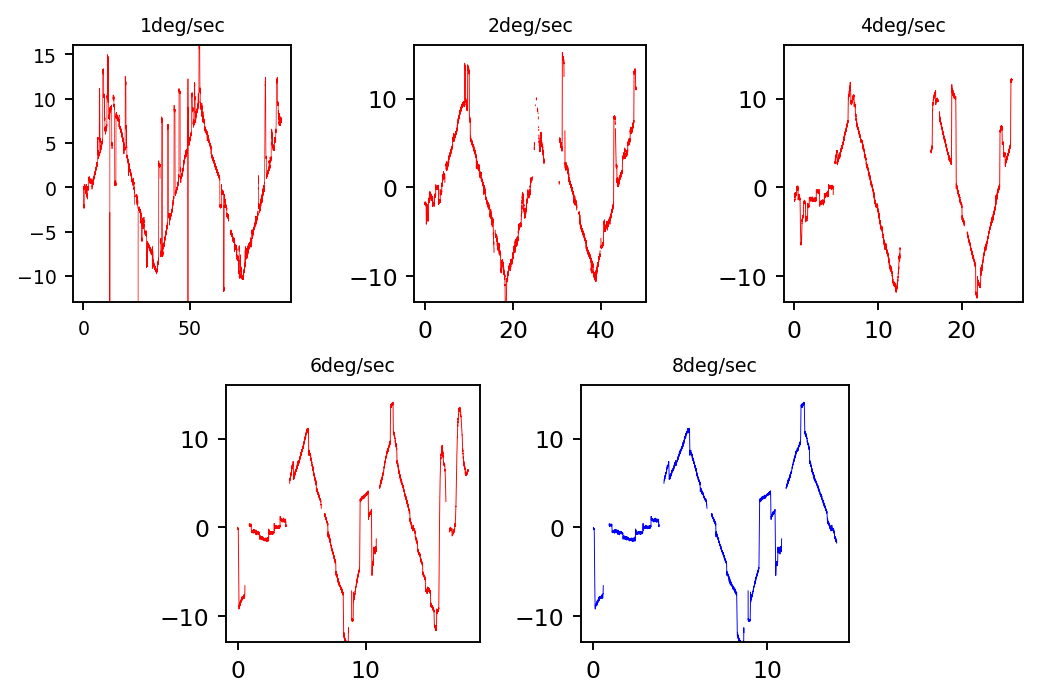

In [9]:
#load data_set
path = os.getcwd()
dirname = os.path.dirname(path)

# for stimulus (speed = 1deg/s, duration = 90 sec)
data_path = dirname+"/data/stimulus/1_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
one_deg_time_sti , one_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 2deg/s, duration = 45 sec)
data_path = dirname+"/data/stimulus/2_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
two_deg_time_sti , two_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 4deg/s, duration = 23 sec)
data_path = dirname+"/data/stimulus/4_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
four_deg_time_sti , four_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 6deg/s, duration = 15 sec)
data_path = dirname+"/data/stimulus/6_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
six_deg_time_sti , six_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 8deg/s, duration = 11 sec)
data_path = dirname+"/data/stimulus/8_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
eight_deg_time_sti , eight_deg_pos_sti =  px_deg_sti(data_sti)

# for eye ( 1deg/s)
data_path = dirname+"/data/PD008(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:27901] # the end of first trial
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 2deg/s)
data_path = dirname+"/data/PD008(HC)/2_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:14401] # the end of first trial
two_deg_time_eye , two_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 4deg/s)
data_path = dirname+"/data/PD008(HC)/4_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:7801] # the end of first trial
four_deg_time_eye , four_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 6deg/s)
data_path = dirname+"/data/PD008(HC)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:5401] # the end of first trial
six_deg_time_eye , six_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 8deg/s)
data_path = dirname+"/data/PD008(HC)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:4201] # the end of first trial
eight_deg_time_eye , eight_deg_pos_eye =  px_deg_eye(data_eye,'right')

# plot
fig = plt.figure(constrained_layout=True,dpi=170)
gs = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

ax1.set_ylim([-13,16])
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
#ax1.plot(one_deg_time_sti , one_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax1.plot(one_deg_time_eye , one_deg_pos_eye,'r',linewidth=0.3,label='Eye Position')
ax1.set_title('1deg/sec',fontdict={'fontsize':8})
#ax1.legend(fontsize = 3,loc = 'upper right')

ax2.set_ylim([-13,16])
#ax2.plot(two_deg_time_sti , two_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax2.plot(two_deg_time_eye , two_deg_pos_eye,'r',linewidth=0.4,label='Eye Position')
ax2.set_title('2deg/sec',fontdict={'fontsize':8})
#ax2.legend(fontsize = 3,loc = 'upper right')

ax3.set_ylim([-13,16])
#ax3.plot(four_deg_time_sti , four_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax3.plot(four_deg_time_eye , four_deg_pos_eye,'r',linewidth=0.4,label='Eye Position')
ax3.set_title('4deg/sec',fontdict={'fontsize':8})
#ax3.legend(fontsize = 3,loc = 'upper right')

ax4.set_ylim([-13,16])
#ax4.plot(six_deg_time_sti , six_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax4.plot(six_deg_time_eye , six_deg_pos_eye,'r',linewidth=0.4,label='Eye Position')
ax4.set_title('6deg/sec',fontdict={'fontsize':8})
#ax4.legend(fontsize = 3,loc = 'upper right')

ax5.set_ylim([-13,16])
#ax5.plot(eight_deg_time_sti , eight_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax5.plot(eight_deg_time_eye , eight_deg_pos_eye,'r',linewidth=0.4,label='Eye Position')
ax5.set_title('8deg/sec',fontdict={'fontsize':8})
#ax5.legend(fontsize = 3,loc = 'upper right')
plt.show()

## Compare between HC and PD

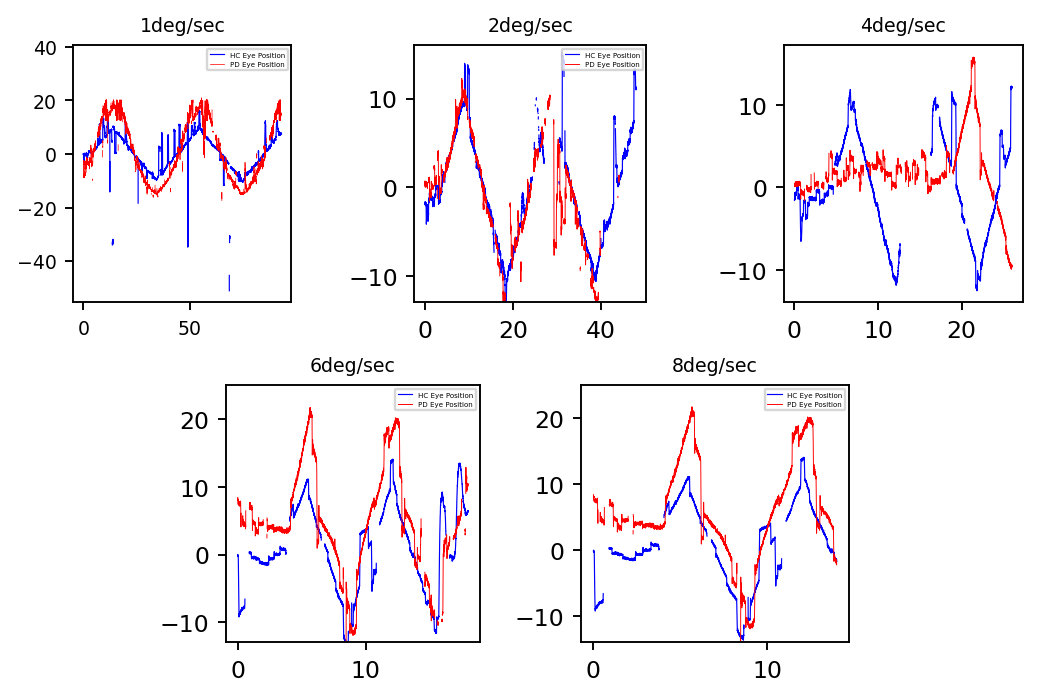

In [12]:
# For Healthy Control
# for eye ( 1deg/s)
data_path = dirname+"/data/PD008(HC)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:27901] # the end of first trial
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 2deg/s)
data_path = dirname+"/data/PD008(HC)/2_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:14401] # the end of first trial
two_deg_time_eye , two_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 4deg/s)
data_path = dirname+"/data/PD008(HC)/4_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:7801] # the end of first trial
four_deg_time_eye , four_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 6deg/s)
data_path = dirname+"/data/PD008(HC)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:5401] # the end of first trial
six_deg_time_eye , six_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 8deg/s)
data_path = dirname+"/data/PD008(HC)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:4201] # the end of first trial
eight_deg_time_eye , eight_deg_pos_eye =  px_deg_eye(data_eye,'right')

# For PD
# for eye ( 1deg/s)
data_path = dirname+"/data/PDQE108(PD)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:27901] # the end of first trial
pd_one_deg_time_eye , pd_one_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 2deg/s)
data_path = dirname+"/data/PDQE108(PD)/2_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:14401] # the end of first trial
pd_two_deg_time_eye , pd_two_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 4deg/s)
data_path = dirname+"/data/PDQE108(PD)/4_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:7801] # the end of first trial
pd_four_deg_time_eye , pd_four_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 6deg/s)
data_path = dirname+"/data/PDQE108(PD)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:5401] # the end of first trial
pd_six_deg_time_eye , pd_six_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 8deg/s)
data_path = dirname+"/data/PDQE108(PD)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:4201] # the end of first trial
pd_eight_deg_time_eye , pd_eight_deg_pos_eye =  px_deg_eye(data_eye,'right')

# plot
fig = plt.figure(constrained_layout=True,dpi=170)
gs = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

ax5.set_ylim([-14,25])
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.plot(one_deg_time_eye , one_deg_pos_eye,'b',linewidth=0.5,label='HC Eye Position')
ax1.plot(pd_one_deg_time_eye , pd_one_deg_pos_eye,'r',linewidth=0.3,label='PD Eye Position')
ax1.set_title('1deg/sec',fontdict={'fontsize':8})
ax1.legend(fontsize = 3,loc = 'upper right')

ax2.set_ylim([-13,16])
ax2.plot(two_deg_time_eye , two_deg_pos_eye,'b',linewidth=0.5,label='HC Eye Position')
ax2.plot(pd_two_deg_time_eye , pd_two_deg_pos_eye,'r',linewidth=0.4,label='PD Eye Position')
ax2.set_title('2deg/sec',fontdict={'fontsize':8})
ax2.legend(fontsize = 3,loc = 'upper right')

ax5.set_ylim([-14,25])
ax3.plot(four_deg_time_eye , four_deg_pos_eye,'b',linewidth=0.5,label='HC Eye Position')
ax3.plot(pd_four_deg_time_eye , pd_four_deg_pos_eye,'r',linewidth=0.4,label='PD Eye Position')
ax3.set_title('4deg/sec',fontdict={'fontsize':8})
#ax3.legend(fontsize = 3,loc = 'upper right')

ax4.set_ylim([-13,25])
ax4.plot(six_deg_time_eye , six_deg_pos_eye,'b',linewidth=0.5,label='HC Eye Position')
ax4.plot(pd_six_deg_time_eye , pd_six_deg_pos_eye,'r',linewidth=0.4,label='PD Eye Position')
ax4.set_title('6deg/sec',fontdict={'fontsize':8})
ax4.legend(fontsize = 3,loc = 'upper right')

ax5.set_ylim([-14,25])
ax5.plot(eight_deg_time_eye , eight_deg_pos_eye,'b',linewidth=0.5,label='HC Eye Position')
ax5.plot(pd_eight_deg_time_eye , pd_eight_deg_pos_eye,'r',linewidth=0.4,label='PD Eye Position')
ax5.set_title('8deg/sec',fontdict={'fontsize':8})
ax5.legend(fontsize = 3,loc = 'upper right')
plt.show()

### For Parkinson Disease(PD) Subject no:PDQE108

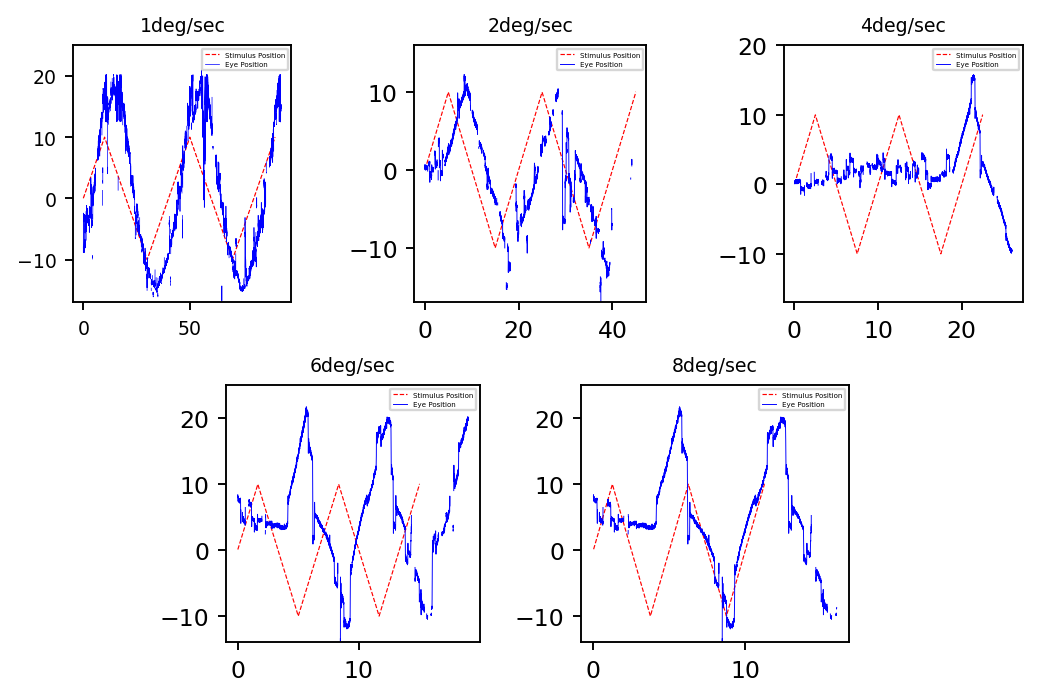

In [97]:
#load data_set
path = os.getcwd()
dirname = os.path.dirname(path)

# for stimulus (speed = 1deg/s, duration = 90 sec)
data_path = dirname+"/data/stimulus/1_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
one_deg_time_sti , one_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 2deg/s, duration = 45 sec)
data_path = dirname+"/data/stimulus/2_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
two_deg_time_sti , two_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 4deg/s, duration = 23 sec)
data_path = dirname+"/data/stimulus/4_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
four_deg_time_sti , four_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 6deg/s, duration = 15 sec)
data_path = dirname+"/data/stimulus/6_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
six_deg_time_sti , six_deg_pos_sti =  px_deg_sti(data_sti)

# for stimulus (speed = 8deg/s, duration = 11 sec)
data_path = dirname+"/data/stimulus/8_deg_per_sec.txt"
data_sti = pd.read_csv(data_path,sep='\s+',header=None)
eight_deg_time_sti , eight_deg_pos_sti =  px_deg_sti(data_sti)

# for eye ( 1deg/s)
data_path = dirname+"/data/PDQE108(PD)/1_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:27901] # the end of first trial
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 2deg/s)
data_path = dirname+"/data/PDQE108(PD)/2_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:14401] # the end of first trial
two_deg_time_eye , two_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 4deg/s)
data_path = dirname+"/data/PDQE108(PD)/4_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:7801] # the end of first trial
four_deg_time_eye , four_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 6deg/s)
data_path = dirname+"/data/PDQE108(PD)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:5701] # the end of first trial
six_deg_time_eye , six_deg_pos_eye =  px_deg_eye(data_eye,'right')

# for eye ( 8deg/s)
data_path = dirname+"/data/PDQE108(PD)/6_deg_per_sec.xlsx"
data  = pd.read_excel(data_path)
data_eye = data[0:4801] # the end of first trial
eight_deg_time_eye , eight_deg_pos_eye =  px_deg_eye(data_eye,'right')

# plot
fig = plt.figure(constrained_layout=True,dpi=170)
gs = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

ax1.set_ylim([-17,28])
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.plot(one_deg_time_sti , one_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax1.plot(one_deg_time_eye , one_deg_pos_eye,'b',linewidth=0.3,label='Eye Position')
ax1.set_title('1deg/sec',fontdict={'fontsize':8})
ax1.legend(fontsize = 3,loc = 'upper right')

ax2.set_ylim([-17,16])
ax2.plot(two_deg_time_sti , two_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax2.plot(two_deg_time_eye , two_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax2.set_title('2deg/sec',fontdict={'fontsize':8})
ax2.legend(fontsize = 3,loc = 'upper right')

ax3.set_ylim([-17,20])
ax3.plot(four_deg_time_sti , four_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax3.plot(four_deg_time_eye , four_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax3.set_title('4deg/sec',fontdict={'fontsize':8})
ax3.legend(fontsize = 3,loc = 'upper right')

ax4.set_ylim([-14,25])
ax4.plot(six_deg_time_sti , six_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax4.plot(six_deg_time_eye , six_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax4.set_title('6deg/sec',fontdict={'fontsize':8})
ax4.legend(fontsize = 3,loc = 'upper right')

ax5.set_ylim([-14,25])
ax5.plot(eight_deg_time_sti , eight_deg_pos_sti,'r--',linewidth=0.5,label='Stimulus Position')
ax5.plot(eight_deg_time_eye , eight_deg_pos_eye,'b',linewidth=0.4,label='Eye Position')
ax5.set_title('8deg/sec',fontdict={'fontsize':8})
ax5.legend(fontsize = 3,loc = 'upper right')
plt.show()

In [1]:
import numpy as np

In [2]:
np.__version__

'1.21.5'

In [3]:
from pyts . classification import BOSSVS
from pyts . datasets import load_gunpoint


In [4]:
 # Load the GunPoint data set
X_train , X_test , y_train , y_test = load_gunpoint ( return_X_y = True )

In [5]:
 # Create the classifier
clf = BOSSVS ( window_size =28)


In [6]:
 # Fit the classifier on the training set
clf . fit ( X_train , y_train )

BOSSVS(window_size=28)

In [7]:
accuracy = clf . score ( X_test , y_test )


In [8]:

# Print accuracy
print( accuracy )


0.98


In [20]:
def dtw(s,t):
    n,m = len(s),len(t)
    dtw_matrix = np.zeros((n+1,m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i,j] = np.inf
    dtw_matrix[0,0] = 0
    for i in range(1,n+1):
        for j in range(1,m+1):
            cost = abs(s[i-1] - t[j-1])
            last_min = np.min([dtw_matrix[i-1,j],dtw_matrix[i,j-1],dtw_matrix[i-1,j-1]])
            dtw_matrix[i,j] = cost + last_min
    return dtw_matrix

In [21]:
a = [1, 2, 3]
b = [2, 2, 2, 3, 4]
dtw(a,b)

array([[ 0., inf, inf, inf, inf, inf],
       [inf,  1.,  2.,  3.,  5.,  8.],
       [inf,  1.,  1.,  1.,  2.,  4.],
       [inf,  2.,  2.,  2.,  1.,  2.]])

In [25]:
np.min([1,2])

1

In [2]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)


In [3]:
N = 100
x =np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = go.scatter.Marker(
        size = sz,
        color = colors,
        opacity = 0.6,
        colorscale='Viridis'
    )
))
fig.show()

In [6]:
fig.write_image("fig1.png")

In [8]:
from PIL import Image
img = Image.open('fig1.png')
img.convert("L").save('result.png')

In [10]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

#Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()


,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [14]:
# Time Series data source
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

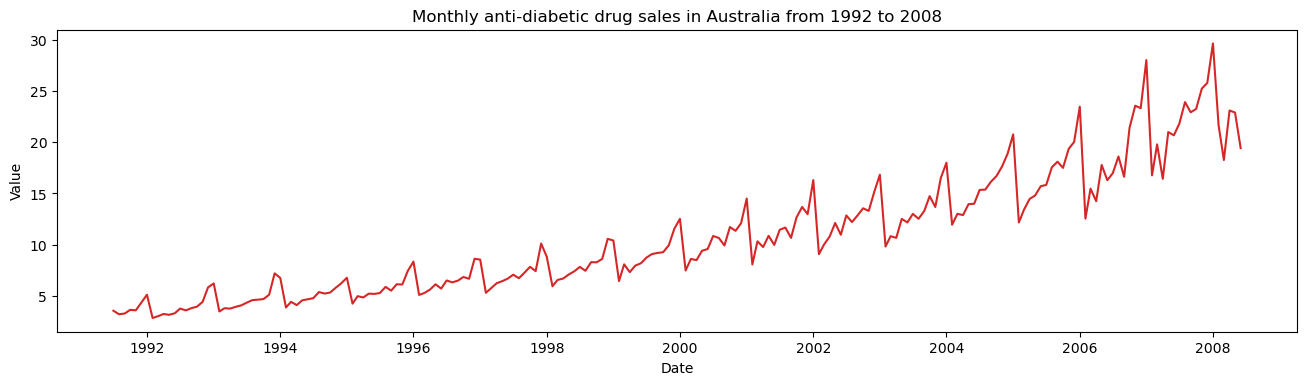

In [17]:
# Draw PLot
def plot_df(df, x, y, title = "",xlabel ='Date', ylabel="Value",dpi=100):
    plt.figure(figsize=(16,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df.index, y = df.value, title = "Monthly anti-diabetic drug sales in Australia from 1992 to 2008")

In [3]:
import pandas as pd
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")

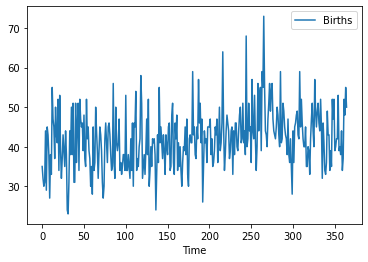

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
series.plot()
plt.xlabel('Time')
plt.show()


In [13]:
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

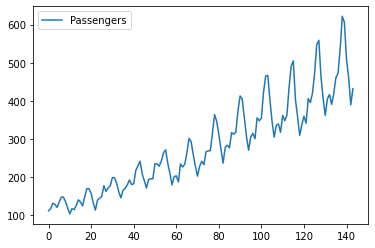

In [15]:
series.plot()
plt.show()

In [18]:
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv",
header = 0, index_col=0)

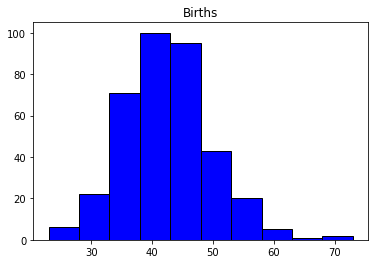

In [29]:
series.hist(ec='k',color='blue')
plt.grid(visible=None)
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import numpy as np
import pycountry_convert as pc
import os
from sklearn.preprocessing import LabelEncoder
from os import listdir
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from os.path import isfile, join
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [62]:
data = pd.read_csv("/Users/zaw/Downloads/GlobalLandTemperaturesByCountry.csv")

<AxesSubplot:>

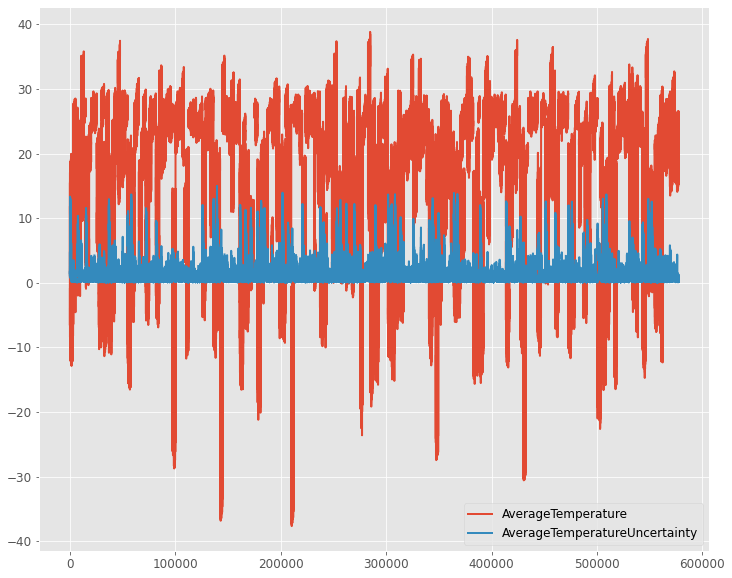

In [35]:
data.plot()

In [63]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [57]:
country_code = pc.country_name_to_country_alpha2(c, cn_name_format="default")
continent_name = pc.country_alpha2_to_continent_code(country_code)

In [64]:
countries = data.Country.drop_duplicates().to_list()
unknown_continent_countries = []
continent_countries = []
known_continent_countries = []
for c in countries:
    try:
        country_code = pc.country_name_to_country_alpha2(c, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent_countries.append(continent_name)
        known_continent_countries.append(c)
        
    except:
        print('The country named %s has no continent' %(c))
        unknown_continent_countries.append(c)
print('The continents that appears in the dataset are' ,list(set(continent_countries)))

The country named Åland has no continent
The country named Africa has no continent
The country named Antarctica has no continent
The country named Antigua And Barbuda has no continent
The country named Asia has no continent
The country named Baker Island has no continent
The country named Bonaire, Saint Eustatius And Saba has no continent
The country named Bosnia And Herzegovina has no continent
The country named Burma has no continent
The country named Côte D'Ivoire has no continent
The country named Congo (Democratic Republic Of The) has no continent
The country named Denmark (Europe) has no continent
The country named Europe has no continent
The country named Falkland Islands (Islas Malvinas) has no continent
The country named Federated States Of Micronesia has no continent
The country named France (Europe) has no continent
The country named French Southern And Antarctic Lands has no continent
The country named Gaza Strip has no continent
The country named Guinea Bissau has no conti

In [59]:
to_add_continents= ['EU','AF','AN','NA','AS','OC','SA','EU','AS','AF','AF','EU','EU','SA','OC','EU','EU','AS','AF','AN',
                   'EU','OC','EU','NA','OC','AS','OC','AF','NA','NA','NA','AF','NA','SA','OC','EU','AS','SA','NA','EU',
                   'NA','AF']
if len(to_add_continents)==len(unknown_continent_countries):
    print('All the countries have a related continent')

All the countries have a related continent


In [65]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [60]:
data.AverageTemperature = data.AverageTemperature.fillna(method='ffill')
data = data.drop(columns='AverageTemperatureUncertainty')
data = data[data.Continent!='AN']
data.tail()

AttributeError: 'DataFrame' object has no attribute 'Continent'

In [61]:
data

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,4.384,Åland
2,1744-01-01,4.384,Åland
3,1744-02-01,4.384,Åland
4,1744-03-01,4.384,Åland
...,...,...,...
577457,2013-05-01,19.059,Zimbabwe
577458,2013-06-01,17.613,Zimbabwe
577459,2013-07-01,17.000,Zimbabwe
577460,2013-08-01,19.759,Zimbabwe


In [67]:
import json

In [68]:
data = {
    "president": {
        "name": "Zaphod Beeblebrox",
        "species": "Betelgeusian"
    }
}

In [69]:
data

{'president': {'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}}

In [70]:
with open("data_file.json", "w") as write_file:
    json.dump(data, write_file)

In [72]:
json_string = json.dumps(data)

# Image Time Sries(ITS)

In [148]:
# Function for pixel to degree conversion

# for stimulus
def px_deg_sti(data):
    time_sti = []
    pos_sti = []

    for y in data[1]:
        new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
        pos_sti.append(new_y)

    for x in range(1,len(pos_sti)+1):
        new_x = round((1/60)*x,4) # for monitor with screen refresh rate( 60 Hz)
        time_sti.append(new_x)
    return time_sti,pos_sti
    
# for eye
def px_deg_eye(data,dominant_eye):
    time_eye = []
    pos_eye = []
    if dominant_eye == 'right':
        for y in data['GazePointRightX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    elif dominant_eye == 'left':
        for y in data['GazePointLeftX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    for x in range(1,len(pos_eye)+1):
        new_x = round((1/300)*(x-900),4) # for tobii's eye tracker with 300 Hz sampling rate
        time_eye.append(new_x)
    return time_eye,pos_eye


In [397]:
import glob
from pathlib import Path
option = ['URLStart','URLEnd']
directory_hc  = dirname+"/data/subjects/HC"
#files = Path(directory_hc).glob('*')
files_hc = glob.iglob(directory_hc+'/[!.]*') # skip unwanted file such as .DS_Store file

for file_hc in files_hc:
    print(os.path.basename(file_hc))

PD002
PD001


In [46]:
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3))
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img

def concat_n_images(image_path_list):
    """
    Combines N color images from a list of image paths.
    """
    output = None
    for i, img_path in enumerate(image_path_list):
        img = plt.imread(img_path)[:,:,:3]
        if i==0:
            output = img
        else:
            output = concat_images(output, img)
    return output



In [50]:
path

'/Users/zaw/Desktop/smooth_pursuit/code'

In [69]:
import glob
from pathlib import Path
s_path = dirname+"/result/s_hc"
c_path = dirname+"/result/c_hc"
data_path = dirname+"/data/subjects/HC/PD001/4_dps.xlsx"
option = ['URLStart','URLEnd']
directory_hc  = dirname+"/data/subjects/HC"
#files = Path(directory_hc).glob('*')
files_hc = glob.iglob(directory_hc+'/[!.]*') # skip unwanted file such as .DS_Store file

for file_hc in files_hc:
    # print(file_hc)
    data_hc  = pd.read_excel(file_hc+'/4_dps.xlsx').interpolate()
    t = data_hc[data_hc['StudioEvent'].isin(option)].index # Caculating start and end of stimuli
    data_eye_hc_first = data_hc[t[0]+2:t[1]+3] # first trial index
    data_eye_hc_second = data_hc[t[2]+2:t[3]+3] # second trail index

    # Interpolate the NaN values with linear
    # First Trial
    data_eye_hc_first_right = data_eye_hc_first['GazePointRightX (ADCSpx)']
    # data_eye_hc_first['GazePointRightY (ADCSpx)'] = data_eye_hc_first['GazePointRightY (ADCSpx)'].interpolate()
    data_eye_hc_first_left = data_eye_hc_first['GazePointLeftX (ADCSpx)']
    # data_eye_hc_first['GazePointLeftY (ADCSpx)'] = data_eye_hc_first['GazePointLeftY (ADCSpx)'].interpolate()
    

    # # Compute Gramian angular fields, GASF
    # #right_x
    fig = plt.figure()
    X = np.array([data_eye_hc_first_right])
    gasf = GramianAngularField(image_size=24,method='summation')
    X_gasf = gasf.fit_transform(X)
    plt.axis('off')
    plt.imshow(X_gasf[0], cmap ="rainbow")
    plt.savefig(s_path+'/'+str(os.path.basename(file_hc))+'_'+'1'+'right.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    # #right_y
    # X = np.array([data_eye_hc_first['GazePointRightY (ADCSpx)']])
    # gasf = GramianAngularField(method='summation')
    # X_gasf = gasf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gasf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'right_y_gasf.png')

    # #left_x
    fig = plt.figure()
    X = np.array([data_eye_hc_first_left])
    gasf = GramianAngularField(image_size=24,method='summation')
    X_gasf = gasf.fit_transform(X)
    plt.axis('off')
    plt.imshow(X_gasf[0], cmap ="rainbow")
    plt.savefig(s_path+'/'+str(os.path.basename(file_hc))+'_'+'1'+'left.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    #combine two images
    fig = plt.figure()
    images = [s_path+'/'+str(os.path.basename(file_hc))+'_'+'1'+'right.png',s_path+'/'+str(os.path.basename(file_hc))+'_'+'1'+'left.png']
    output = concat_n_images(images)
    plt.axis('off')
    plt.imshow(output)
    plt.savefig(c_path+'/'+str(os.path.basename(file_hc))+'_'+'1'+'combine.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    # #left_y
    # X = np.array([data_eye_hc_first['GazePointLeftY (ADCSpx)']])
    # gasf = GramianAngularField(method='summation')
    # X_gasf = gasf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gasf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'left_y_gasf.png')

    # # Compute Gramian angular fields, GADF 
    # #right_x
    # X = np.array([data_eye_hc_first['GazePointRightX (ADCSpx)']])
    # gadf = GramianAngularField(method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'right_x_gadf.png')
    
    # #right_y
    # X = np.array([data_eye_hc_first['GazePointRightY (ADCSpx)']])
    # gadf = GramianAngularField(method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'right_y_gadf.png')

    # #left_x
    # X = np.array([data_eye_hc_first['GazePointLeftX (ADCSpx)']])
    # gadf = GramianAngularField(method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'left_x_gadf.png')

    # #left_y
    # X = np.array([data_eye_hc_first['GazePointLeftY (ADCSpx)']])
    # gadf = GramianAngularField(method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'left_y_gadf.png')


    # # Compute Gramian angular MTF
    # #right_x
    # X = np.array([data_eye_hc_first['GazePointRightX (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'right_x_mtf.png')
    
    # #right_y
    # X = np.array([data_eye_hc_first['GazePointRightY (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'right_y_mtf.png')

    # #left_x
    # X = np.array([data_eye_hc_first['GazePointLeftX (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'left_x_mtf.png')

    # #left_y
    # X = np.array([data_eye_hc_first['GazePointLeftY (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'1'+'left_y_mtf.png')

    # Second Trial
    data_eye_hc_second_right = data_eye_hc_second['GazePointRightX (ADCSpx)']
    #data_eye_hc_second['GazePointRightY (ADCSpx)'] = data_eye_hc_second['GazePointRightY (ADCSpx)'].interpolate()
    data_eye_hc_second_left = data_eye_hc_second['GazePointLeftX (ADCSpx)']
    #data_eye_hc_second['GazePointLeftY (ADCSpx)'] = data_eye_hc_second['GazePointLeftY (ADCSpx)'].interpolate()

    # Compute Gramian angular fields, GASF
    #right_x
    fig = plt.figure()
    X = np.array([data_eye_hc_second_right])
    gasf = GramianAngularField(image_size=24,method='summation')
    X_gasf = gasf.fit_transform(X)
    plt.axis('off')
    plt.imshow(X_gasf[0], cmap ="rainbow")
    plt.savefig(s_path+'/'+str(os.path.basename(file_hc))+'_'+'2'+'right.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    # #right_y
    # X = np.array([data_eye_hc_second['GazePointRightY (ADCSpx)']])
    # gasf = GramianAngularField(image_size=24,method='summation')
    # X_gasf = gasf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gasf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'right_y_gasf.png')

    #left_x
    fig = plt.figure()
    X = np.array([data_eye_hc_second_left])
    gasf = GramianAngularField(image_size=24,method='summation')
    X_gasf = gasf.fit_transform(X)
    plt.axis('off')
    plt.imshow(X_gasf[0], cmap ="rainbow")
    plt.savefig(s_path+'/'+str(os.path.basename(file_hc))+'_'+'2'+'left.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    #Combine two images
    fig = plt.figure()
    images = [s_path+'/'+str(os.path.basename(file_hc))+'_'+'2'+'right.png',s_path+'/'+str(os.path.basename(file_hc))+'_'+'2'+'left.png']
    output = concat_n_images(images)
    plt.axis('off')
    plt.imshow(output)
    plt.savefig(c_path+'/'+str(os.path.basename(file_hc))+'_'+'2'+'combine.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    # #left_y
    # X = np.array([data_eye_hc_second['GazePointLeftY (ADCSpx)']])
    # gasf = GramianAngularField(method='summation')
    # X_gasf = gasf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gasf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'left_y_gasf.png')

    # # Compute Gramian angular fields, GADF 
    # #right_x
    # X = np.array([data_eye_hc_second['GazePointRightX (ADCSpx)']])
    # gadf = GramianAngularField(image_size=24,method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'right_x_gadf.png')
    
    # #right_y
    # X = np.array([data_eye_hc_second['GazePointRightY (ADCSpx)']])
    # gadf = GramianAngularField(method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'right_y_gadf.png')

    # #left_x
    # X = np.array([data_eye_hc_second['GazePointLeftX (ADCSpx)']])
    # gadf = GramianAngularField(image_size=24,method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'left_x_gadf.png')

    # #left_y
    # X = np.array([data_eye_hc_second['GazePointLeftY (ADCSpx)']])
    # gadf = GramianAngularField(method='difference')
    # X_gadf = gadf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_gadf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'left_y_gadf.png')


    # Compute Gramian angular MTF
    # #right_x
    # X = np.array([data_eye_hc_second['GazePointRightX (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'right_x_mtf.png')
    
    # #right_y
    # X = np.array([data_eye_hc_second['GazePointRightY (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'right_y_mtf.png')

    # #left_x
    # X = np.array([data_eye_hc_second['GazePointLeftX (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'left_x_mtf.png')

    # #left_y
    # X = np.array([data_eye_hc_second['GazePointLeftY (ADCSpx)']])
    # mtf = MarkovTransitionField(n_bins=9)
    # X_mtf = mtf.fit_transform(X)
    # plt.axis('off')
    # plt.imshow(X_mtf[0], cmap ="rainbow")
    # plt.savefig(os.path.basename(file_hc)+'_'+'2'+'left_y_mtf.png')



In [8]:
path

'/Users/zaw/Desktop/smooth_pursuit/code'

In [59]:
dirname

'/Users/zaw/Desktop/smooth_pursuit'

# Tutorial

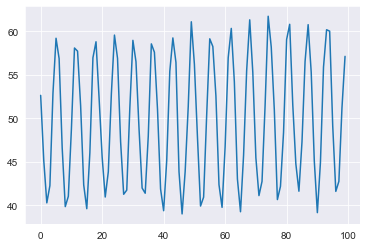

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#Here we will just create a random series with seasonality and a slight trend
seasonality = ((np.cos(np.arange(1, 101))*10 + 50))
np.random.seed(100)
true = np.linspace(-1, 1, 100)
noise = np.random.normal(0, 1, 100)
y = true + seasonality + noise
plt.plot(y)
plt.show()

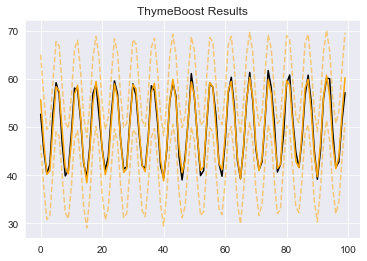

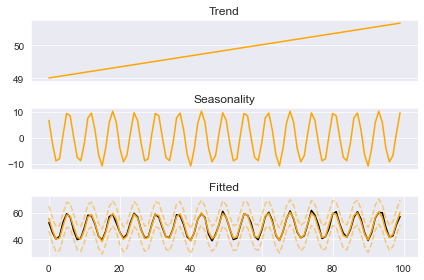

In [18]:
from ThymeBoost import ThymeBoost as tb
boosted_model = tb.ThymeBoost()
output = boosted_model.detect_outliers(y,
                                       trend_estimator='linear',
                                       seasonal_estimator='fourier',
                                       seasonal_period=25,
                                       global_cost='maicc',
                                       fit_type='global')
boosted_model.plot_results(output)
boosted_model.plot_components(output)

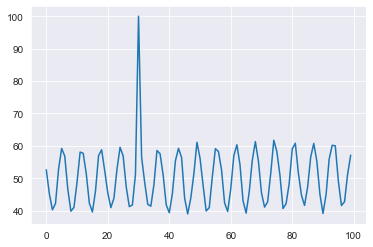

In [19]:
y[30] = 100
plt.plot(y)
plt.show()

In [29]:
X = np.array([data_eye_pd_first['GazePointRightX (ADCSpx)']]).flatten()
boosted_model = tb.ThymeBoost()
output = boosted_model.detect_outliers(X,
                                       trend_estimator='linear',
                                       seasonal_estimator='fourier',
                                       seasonal_period=25,
                                       global_cost='maicc',
                                       fit_type='global')
boosted_model.plot_results(output)
boosted_model.plot_components(output)

AssertionError: Boosting terminated before beginning

In [13]:
from kats.consts import TimeSeriesData

# Construct TimeSeriesData object
df = df.rename(columns={"Hour Index": "time", "Users": "value"})
ts = TimeSeriesData(df)

In [15]:
def plot_date(day: str, df: pd.DataFrame):
    day1 = df[
        (df["Hour Index"] >= f"{day} 00:00:00")
        & (df["Hour Index"] <= f"{day} 23:00:00")
    ]
    day1.set_index("Hour Index").plot()
    
plot_date("2021-06-01", df)

TypeError: Invalid comparison between dtype=int64 and str

In [133]:
from kats.detectors.seasonality import FFTDetector

fft_detector = FFTDetector(ts)
fft_detector.detector()

ImportError: cannot import name 'outcome_constraint_from_str' from 'ax.service.utils.instantiation' (/Users/zaw/miniforge3/envs/ds/lib/python3.9/site-packages/ax/service/utils/instantiation.py)

In [50]:
import numpy as np
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

In [436]:
X = data_eye_pd_first['GazePointRightX (ADCSpx)'].dropna()

In [428]:
data_eye_pd_first['GazePointRightX (ADCSpx)'] = data_eye_pd_first['GazePointRightX (ADCSpx)'].dropna()

In [433]:
data_eye_pd_first['GazePointRightX (ADCSpx)'].isna().any()

True

In [437]:
np.isnan(X).any()

False

In [ ]:
X = X 

In [434]:
X

1051      NaN
1052      NaN
1053      NaN
1054    741.0
1055    744.0
        ...  
7948    939.0
7949    940.0
7950    948.0
7951    929.0
7952    944.0
Name: GazePointRightX (ADCSpx), Length: 6902, dtype: float64

In [426]:
data = X.values.reshape(1,-1)

In [425]:
np.isinf(data).any()

False

In [496]:
data = X.values.reshape(1,-1)
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)
low, up = smoother.get_intervals('prediction_interval')
points = smoother.data[0]
up_points = up[0]
low_points = low[0]
outlier = []
for i in range(len(points)-1, 0, -1):
    current_point = points[i]
    current_up = up_points[i]
    current_low = low_points[i]
    if current_point > current_up or current_point < current_low:
        outlier.append(current_point)
        #print(f'found an outlier value: {current_point}')
#print(outlier)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [407]:
np.isnan(data_eye_pd_first['GazePointRightX (ADCSpx)']).any()

True

In [110]:
def outlier_remove(df,eye):
    data = df[eye].interpolate()
    data = data.dropna()
    data = data.values.reshape(1,-1)
    smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
    smoother.smooth(data)
    low, up = smoother.get_intervals('prediction_interval')
    points = smoother.data[0]
    up_points = up[0]
    low_points = low[0]
    outlier = []
    for i in range(len(points)-1, 0, -1):
        current_point = points[i]
        current_up = up_points[i]
        current_low = low_points[i]
        if current_point > current_up or current_point < current_low:
            outlier.append(current_point)
    return outlier
    #for i in outlier:
    # for i in outlier:
    #      df.drop(df.index[df[eye] == i],inplace=True)
    # new_df = df
    # return new_df
    
        

In [ ]:
no_outlier = 

In [111]:
outlier = outlier_remove(data_eye_pd_first,'GazePointRightX (ADCSpx)')


In [112]:
for i in outlier: data_eye_pd_first.drop(data_eye_pd_first.index[data_eye_pd_first['GazePointRightX (ADCSpx)'] == i],inplace=True)


In [492]:
 np.isnan(data_eye_pd_first['GazePointRightX (ADCSpx)']).any().sum()

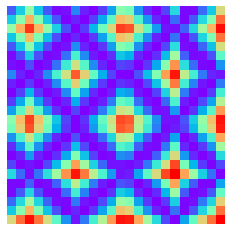

In [502]:
# GASF , GADF
X = np.array([data_eye_pd_first['GazePointRightX (ADCSpx)'].dropna()])

# Compute Gramian angular fields
gasf = GramianAngularField(image_size=24,method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(image_size=24,method='difference')
X_gadf = gadf.fit_transform(X)

mtf = MarkovTransitionField(image_size=24,n_bins=9)
X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")

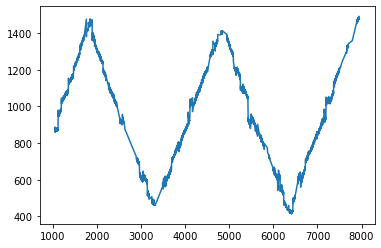

In [113]:
plt.plot(data_eye_pd_first['GazePointRightX (ADCSpx)'])

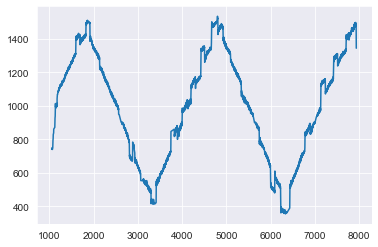

In [465]:
plt.plot(data_eye_pd_first['GazePointRightX (ADCSpx)'].interpolate())

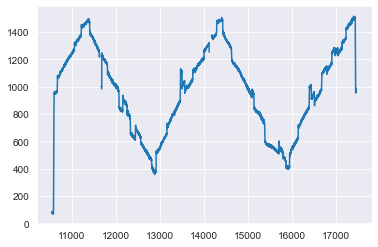

In [388]:
plt.plot(data_eye_pd_second['GazePointRightX (ADCSpx)'])

# Tutorial End


In [3]:
#pixel to degree
def px_deg_eye(data,dominant_eye):
    time_eye = []
    pos_eye = []
    if dominant_eye == 'right':
        for y in data['GazePointRightX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    elif dominant_eye == 'left':
        for y in data['GazePointLeftX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    for x in range(1,len(pos_eye)+1):
        new_x = round((1/300)*x,4) # for tobii's eye tracker with 300 Hz sampling rate (x-900)
        time_eye.append(new_x)
    return time_eye,pos_eye

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from pyts.image import GramianAngularField
import time

In [6]:
data = np.loadtxt('sinx.csv', delimiter=",").reshape(1,-1)

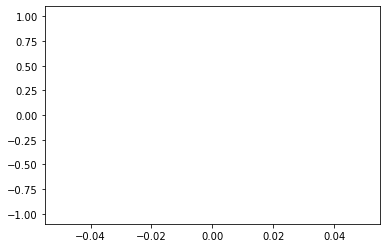

In [7]:
plt.plot(data)

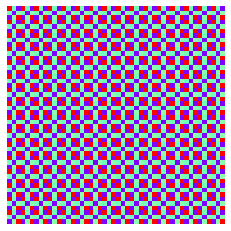

In [13]:
gasf = GramianAngularField(image_size=48,method='summation')
X_gasf = gasf.fit_transform(data)

# gadf = GramianAngularField(image_size=24,method='difference')
# X_gadf = gadf.fit_transform(X)

# mtf = MarkovTransitionField(image_size=24,n_bins=9)
# X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")

# Experimental Test setting

In [57]:
#load data_set
path = os.getcwd()
dirname = os.path.dirname(path)
# # for HC ( 1deg/s)
# data_path = dirname+"/data/subjects/HC/PD001/4_dps.xlsx"
# data_hc  = pd.read_excel(data_path).interpolate()
# #data_eye_hc = data_hc[151:9430] # the end of first trial

# for stimulus (speed = 1deg/s, duration = 90 sec)
# data_path = dirname+"/data/stimulus/4_deg_per_sec.txt"
# data_sti = pd.read_csv(data_path,sep='\s+',header=None)
# one_deg_time_sti , one_deg_pos_sti =  px_deg_sti(data_sti)

# #load data_set
path = os.getcwd()
dirname = os.path.dirname(path)
# for PD ( 1deg/s)
option = ['URLStart','URLEnd']
data_path = dirname+"/data/subjects/HC/PD008_right/4_dps.xlsx"
data_pd  = pd.read_excel(data_path)#interpolate()
#data_eye_pd = data_pd[217:9301] # the end of first trial

# sti_event = data_pd[data_pd['StudioEvent'].isin(option)].index # Caculating start and end of stimuli

# data_eye_pd_first = data_pd[sti_event[0]+902:sti_event[0]+7804]
# data_eye_pd_second = data_pd[sti_event[2]+902:sti_event[2]+7804]
# one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_first,'right')
# one_deg_time_eye_second , one_deg_pos_eye_second =  px_deg_eye(data_eye_pd_first,'right')

#data_eye_pd_first = data_pd[t[0]+2+900:7017+900] # first trial index t[1]+3
#data_eye_pd_second = data_pd[sti_event[2]+2:t[3]+3]
#one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_first,'right')

In [95]:
sti_event = data_pd[data_pd['StudioEvent'].isin(option)].index # Caculating start and end of stimuli

data_eye_pd_first = data_pd[sti_event[0]+902:sti_event[0]+7804]
data_eye_pd_second = data_pd[sti_event[2]+902:sti_event[2]+7804]

In [97]:
def remove_outlier_IQR(df,i):
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[i][~((df[i]<(Q1-1.5*IQR)) | (df[i]>(Q3+1.5*IQR)))]
    return df_final

In [98]:
def blink_nan(series,i):
    df = pd.DataFrame(series)
    df['new'] = ((df[i].notnull() != df[i].shift().notnull()).cumsum())
    df['ones'] =1
    mask_zeros = (df.groupby('new')['ones'].transform('count') == 23 ) | df[i].notnull()
    #mask_zeros = (df.groupby('new')['ones'].transform('count') > 23 ) & (df.groupby('new')['ones'].transform('count') < 50) | df[i].notnull()
    blink_series = series.fillna(0).where(mask_zeros)
    interpolate_series = pd.Series(blink_series).interpolate()
    # interpolate_series = interpolate_series.interpolate(mehtod='ffill')
    # interpolate_series = interpolate_series.interpolate(mehtod='bffill')
    return interpolate_series

In [99]:
data_eye_pd_second['GazePointRightX (ADCSpx)'].isna().sum()

1801

In [100]:
data_eye_pd_first  = remove_outlier_IQR(data_eye_pd_first,'GazePointRightX (ADCSpx)')
data_eye_pd_first  = data_eye_pd_first.to_frame()
data_eye_pd_first  =  blink_nan(data_eye_pd_first['GazePointRightX (ADCSpx)'],'GazePointRightX (ADCSpx)')
#data_eye_pd_first  = data_eye_pd_first.dropna(thresh=22)
data_eye_pd_first  = data_eye_pd_first.to_frame()

In [101]:
# data_eye_pd_first = data_pd[sti_event[0]+902:sti_event[0]+27904]
# data_eye_pd_second = data_pd[sti_event[2]+902:sti_event[2]+27904]

# outlier_r  = outlier_remove(data_eye_pd_first,'GazePointRightX (ADCSpx)')
# for i in outlier_r: data_eye_pd_first.drop(data_eye_pd_first.index[data_eye_pd_first['GazePointRightX (ADCSpx)'] == i],inplace=True)

data_eye_pd_second  = remove_outlier_IQR(data_eye_pd_second,'GazePointRightX (ADCSpx)')
data_eye_pd_second  = data_eye_pd_second.to_frame()
data_eye_pd_second  =  blink_nan(data_eye_pd_second['GazePointRightX (ADCSpx)'],'GazePointRightX (ADCSpx)')
#data_eye_pd_first  = data_eye_pd_first.dropna(thresh=22)
data_eye_pd_second  = data_eye_pd_second.to_frame()


In [102]:
data_eye_pd_second['GazePointRightX (ADCSpx)'].isna().sum()

0

In [92]:
# Function for pixel to degree conversion

# for stimulus
def px_deg_sti(data):
    time_sti = []
    pos_sti = []
    for y in data[1]:
        new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
        pos_sti.append(new_y)

    for x in range(1,len(pos_sti)+1):
        new_x = round((1/60)*x,4) # for monitor with screen refresh rate( 60 Hz)
        time_sti.append(new_x)
    return time_sti,pos_sti
    
# for eye
def px_deg_eye(data,dominant_eye):
    time_eye = []
    pos_eye = []
    if dominant_eye == 'right':
        for y in data['GazePointRightX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    elif dominant_eye == 'left':
        for y in data['GazePointLeftX (ADCSpx)']:
            new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
            pos_eye.append(new_y)
    for x in range(1,len(pos_eye)+1):
        new_x = round((1/300)*x,4) # for tobii's eye tracker with 300 Hz sampling rate
        time_eye.append(new_x)
    return time_eye,pos_eye

In [81]:
#data_eye_pd_first['GazePointRightX (ADCSpx)'] = data_eye_pd_first['GazePointRightX (ADCSpx)'].interpolate()

In [93]:
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_second,'right')

In [87]:
df  = pd.DataFrame(one_deg_time_eye,one_deg_pos_eye)

In [88]:
df.isnull().values.sum()

0

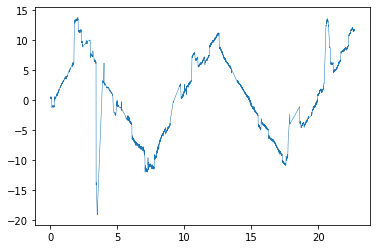

In [94]:
plt.plot(one_deg_time_eye , one_deg_pos_eye,linewidth=0.5)

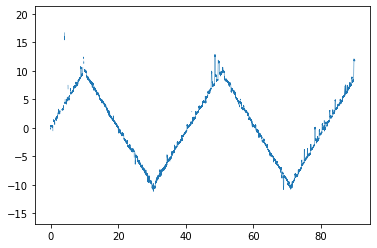

In [294]:
plt.plot(one_deg_time_eye , one_deg_pos_eye,linewidth=0.5)

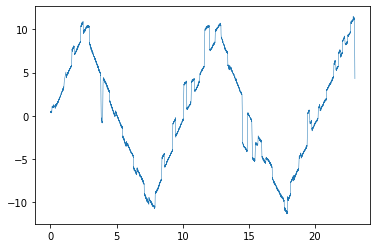

In [152]:
plt.plot(one_deg_time_eye , one_deg_pos_eye,linewidth=0.5)

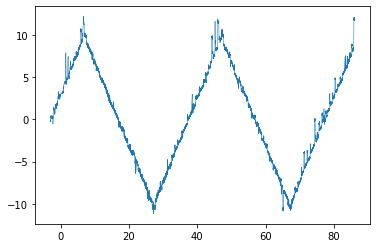

In [79]:
plt.plot(one_deg_time_eye , one_deg_pos_eye,linewidth=0.5)

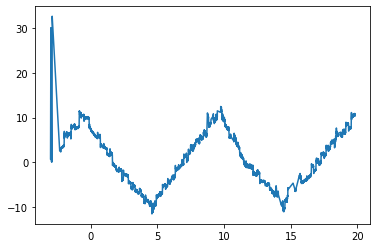

In [55]:
plt.plot(one_deg_time_eye , one_deg_pos_eye)

In [ ]:
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_first,'right')
one_deg_time_eye_second , one_deg_pos_eye_second =  px_deg_eye(data_eye_pd_first,'right')

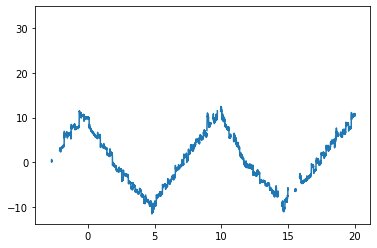

In [17]:
plt.plot(one_deg_time_eye , one_deg_pos_eye)


In [27]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [28]:
df_outlier_removed=remove_outlier_IQR(data_eye_pd_first['GazePointRightX (ADCSpx)'])
#df_outlier_removed=pd.DataFrame(df_outlier_removed)
#ind_diff=df.index.difference(df_outlier_removed.index)

In [460]:
len(ind_diff)

1051

In [25]:
df_outlier_removed =df_outlier_removed.interpolate()

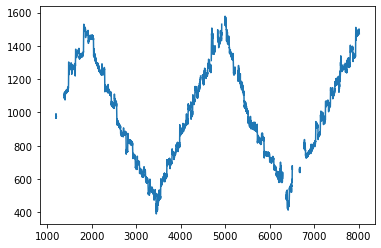

In [29]:
plt.plot(df_outlier_removed)

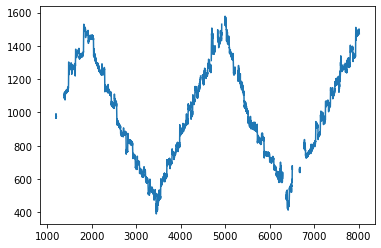

In [24]:
plt.plot(df_outlier_removed)

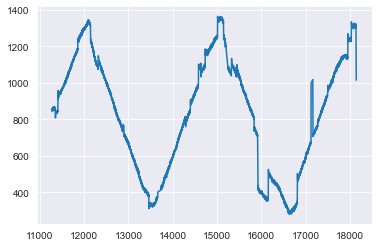

In [268]:
plt.plot(data_eye_pd_second['GazePointRightX (ADCSpx)'])

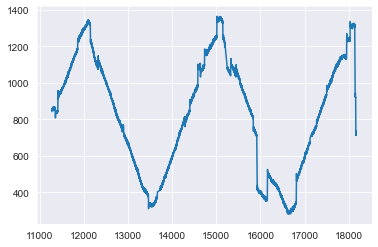

In [240]:
plt.plot(df_outlier_removed)

<AxesSubplot:xlabel='GazePointRightX (ADCSpx)'>

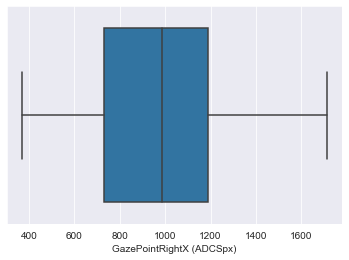

In [92]:
sns.boxplot(data_eye_pd_first['GazePointRightX (ADCSpx)'])

In [103]:
## Check NaN
nan_percent = data_eye_pd_first['GazePointRightX (ADCSpx)'].isnull().sum()/len(data_eye_pd_first)*100
print("{:.2f}".format(nan_percent)+' %')

0.54 %


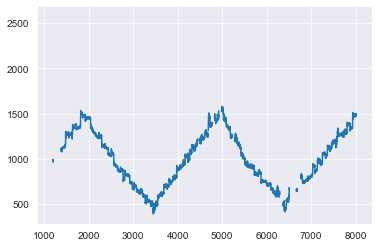

In [49]:
plt.plot(data_eye_pd_first['GazePointRightX (ADCSpx)'])

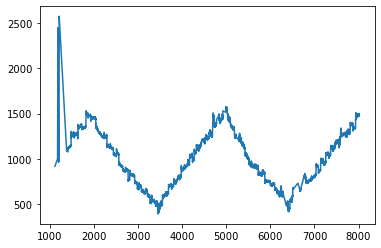

In [114]:
plt.plot(data_eye_pd_first['GazePointRightX (ADCSpx)'])

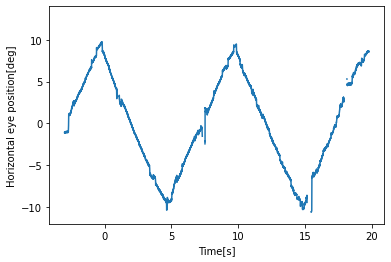

In [110]:
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_first,'right')
plt.plot(one_deg_time_eye,one_deg_pos_eye)
plt.ylim([-12,14])
plt.xlabel('Time[s]')
plt.ylabel('Horizontal eye position[deg]')
plt.savefig('pd.png',dpi=300)

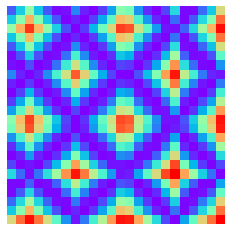

In [476]:
# GASF , GADF
X = np.array([data_eye_pd_first['GazePointRightX (ADCSpx)'].dropna()])

# Compute Gramian angular fields
gasf = GramianAngularField(image_size=24,method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(image_size=24,method='difference')
X_gadf = gadf.fit_transform(X)

mtf = MarkovTransitionField(image_size=24,n_bins=9)
X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")

# Test End here

In [158]:
# option = ['URLStart','URLEnd']
# #data_hc  = pd.read_excel(file_hc+'/4_dps.xlsx')
# t = data_hc[data_hc['StudioEvent'].isin(option)].index # Caculating start and end of stimuli
# data_eye_hc_first = data_hc[t[0]+2:t[1]+3] # first trial index
# data_eye_hc_second = data_hc[t[2]+2:t[3]+3] # second trail index
# #data_eye_hc_second = data_eye_hc_second.interpolate()

t = data_pd[data_pd['StudioEvent'].isin(option)].index # Caculating start and end of stimuli
data_eye_pd_first = data_pd[t[0]+2:t[1]+3] # first trial index
data_eye_pd_second = data_pd[t[2]+2:t[3]+3]
# GASF , GADF
# X = np.array([data_eye_pd_first['GazePointRightX (ADCSpx)']])

# # Compute Gramian angular fields
# gasf = GramianAngularField(image_size=24,method='summation')
# X_gasf = gasf.fit_transform(X)

# X = np.array([data_eye_pd_second['GazePointLeftX (ADCSpx)']])
# # Compute Gramian angular fields
# gasf = GramianAngularField(image_size=24,method='summation')
# X_gasf = gasf.fit_transform(X)

In [161]:
one_deg_time_eye , one_deg_pos_eye =  px_deg_eye(data_eye_pd_second,'right')

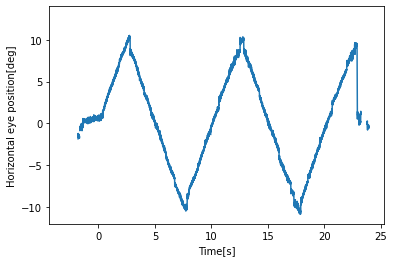

In [162]:
plt.plot(one_deg_time_eye,one_deg_pos_eye)
plt.ylim([-12,14])
plt.xlabel('Time[s]')
plt.ylabel('Horizontal eye position[deg]')
plt.savefig('pd.png',dpi=300)

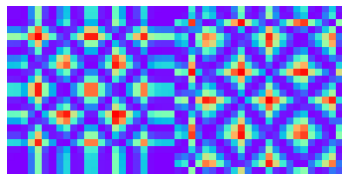

In [54]:
# GASF , GADF
X = np.array([data_eye_pd_first['GazePointRightX (ADCSpx)']])

# Compute Gramian angular fields
gasf = GramianAngularField(image_size=24,method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(image_size=24,method='difference')
X_gadf = gadf.fit_transform(X)

mtf = MarkovTransitionField(image_size=24,n_bins=9)
X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")
plt.savefig('right.png', bbox_inches='tight', pad_inches=0)

X = np.array([data_eye_pd_second['GazePointLeftX (ADCSpx)']])
# Compute Gramian angular fields
gasf = GramianAngularField(image_size=24,method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(image_size=24,method='difference')
X_gadf = gadf.fit_transform(X)

mtf = MarkovTransitionField(image_size=24,n_bins=9)
X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")
plt.savefig('left.png', bbox_inches='tight', pad_inches=0)

# import cv2
# import PIL
# img1 = cv2.imread('right.png')
# img2 = cv2.imread('left.png')
# # im_h = cv2.hconcat([img1, img2])
# # plt.imshow(im_h,cmap ="rainbow")
# # plt.savefig('combine.png', bbox_inches='tight', pad_inches=0)
# # list_im = [img1,img2]
# # imgs    = [ PIL.Image.open(i) for i in list_im ]
# # min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
# # imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# # # save that beautiful picture
# # imgs_comb = PIL.Image.fromarray( imgs_comb)
# # imgs_comb.save( 'Trifecta.jpg' )
# def concat_images(imga, imgb):
#     """
#     Combines two color image ndarrays side-by-side.
#     """
#     ha,wa = imga.shape[:2]
#     hb,wb = imgb.shape[:2]
#     max_height = np.max([ha, hb])
#     total_width = wa+wb
#     new_img = np.zeros(shape=(max_height, total_width, 3))
#     new_img[:ha,:wa]=imga
#     new_img[:hb,wa:wa+wb]=imgb
#     return new_img

# def concat_n_images(image_path_list):
#     """
#     Combines N color images from a list of image paths.
#     """
#     output = None
#     for i, img_path in enumerate(image_path_list):
#         img = plt.imread(img_path)[:,:,:3]
#         if i==0:
#             output = img
#         else:
#             output = concat_images(output, img)
#     return output

# images = ['right.png','left.png']
# output = concat_n_images(images)
# plt.imshow(output)
# c_path = path+'/HC'
# plt.savefig(c_path+'/'+'combine.png', bbox_inches='tight', pad_inches=0)

In [45]:
from PIL import Image
im = Image.open('right.png', 'r')
width, height = im.size
pixel_values = list(im.getdata())
print(width,height)

217 217


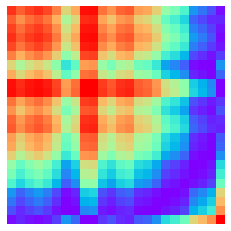

In [195]:
# GASF , GADF
X = np.array([data_eye_pd_first[0:1502]['GazePointLeftX (ADCSpx)']])

# Compute Gramian angular fields
gasf = GramianAngularField(image_size=24,method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(image_size=24,method='difference')
X_gadf = gadf.fit_transform(X)

mtf = MarkovTransitionField(image_size=24,n_bins=9)
X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")
#plt.savefig('new_pd_2.png')

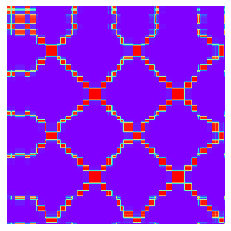

In [129]:
# GASF , GADF
X = np.array([data_eye_hc_first['GazePointRightX (ADCSpx)']])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

mtf = MarkovTransitionField(n_bins=9)
X_mtf = mtf.fit_transform(X)

plt.axis('off')
plt.imshow(X_mtf[0], cmap ="rainbow")

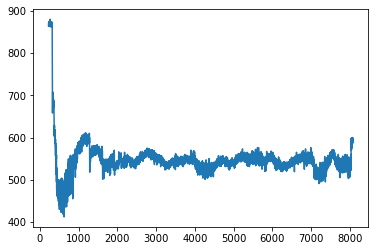

In [111]:
plt.plot(data_eye_hc_first['GazePointRightY (ADCSpx)'])

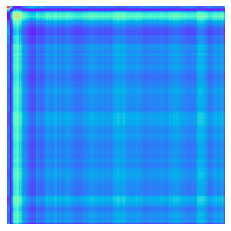

In [108]:
# GASF , GADF
X = np.array([data_eye_hc_first['GazePointRightY (ADCSpx)']])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)
plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")

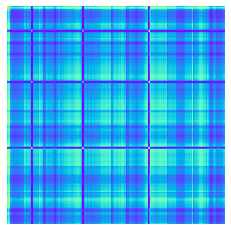

In [100]:
# GASF , GADF
X = np.array([data_eye_hc_second['GazePointRightY (ADCSpx)']])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")

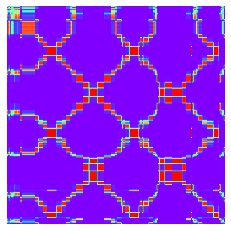

In [89]:
# MTF
X = np.array([data_eye_hc_second['GazePointRightX (ADCSpx)']])
# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=9)
X_mtf = mtf.fit_transform(X)
plt.axis('off')
plt.imshow(X_mtf[0], cmap ="rainbow")

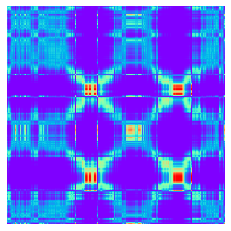

In [88]:
X = np.array([data_eye_hc_second['GazePointRightY (ADCSpx)']])
# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=9)
X_mtf = mtf.fit_transform(X)
plt.axis('off')
plt.imshow(X_mtf[0], cmap ="rainbow")

In [489]:
t[1]+3

9431

In [482]:
data_hc[9654:9656]['RecordingTimestamp']

9654    32157
9655    32160
Name: RecordingTimestamp, dtype: int64

##### Interpolate

In [443]:
data_eye_hc_second['GazePointRightX (ADCSpx)'] = data_eye_hc_second['GazePointRightX (ADCSpx)'].interpolate()
# data_eye_pd['GazePointRightX (ADCSpx)'] = data_eye_pd['GazePointRightX (ADCSpx)'].interpolate()
# one_deg_time_eye_hc , one_deg_pos_eye_hc =  px_deg_eye(data_eye_hc,'right')
# one_deg_time_eye_pd , one_deg_pos_eye_pd =  px_deg_eye(data_eye_pd,'right')

In [374]:
X = data_eye_hc['GazePointRightX (ADCSpx)'].interpolate()
pos_eye = []
for y in X:
    new_y = round((y - 960)/49.6,4) # horizontal center:960x540 pixel : 1 deg = 49.6 pixel
    pos_eye.append(new_y)

#### Smooth

In [168]:
from scipy.signal import savgol_filter
one_deg_pos_eye_hc = savgol_filter(one_deg_pos_eye_hc,99,1)
one_deg_pos_eye_pd = savgol_filter(one_deg_pos_eye_pd,99,1)

### GADF and GASF

In [485]:
X = np.array([data_eye_hc_second['GazePointRightX (ADCSpx)']])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [386]:
a = "ccc"

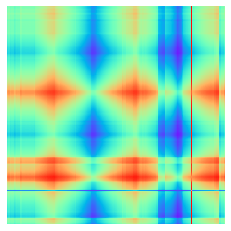

In [451]:
plt.axis('off')
plt.imshow(X_gadf[0], cmap ="rainbow")
# plt.savefig(a+'_'+'books_read.png')

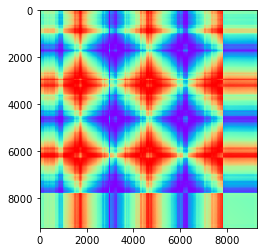

In [380]:
plt.imshow(X_gadf[0], cmap ="rainbow")
plt.show()

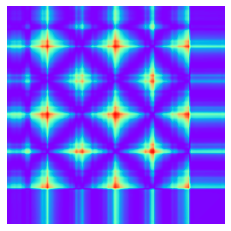

In [155]:
plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")
plt.show()

In [169]:
X = np.array([one_deg_pos_eye_pd])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

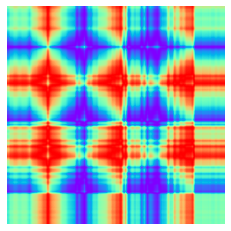

In [170]:
plt.axis('off')
plt.imshow(X_gadf[0], cmap ="rainbow")
plt.show()

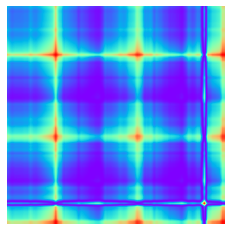

In [142]:
plt.axis('off')
plt.imshow(X_gasf[0], cmap ="rainbow")
plt.show()

#### MTF

In [394]:
X = np.array([one_deg_pos_eye_hc])
# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=9)
X_mtf = mtf.fit_transform(X)

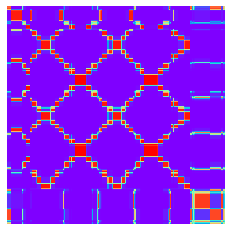

In [395]:
plt.axis('off')
plt.imshow(X_mtf[0], cmap ="rainbow")


In [91]:
X = np.array([one_deg_pos_eye_pd])
# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

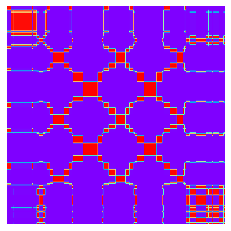

In [92]:
plt.axis('off')
plt.imshow(X_mtf[0], cmap ="rainbow")

### Single GASF and GADF

/var/folders/hj/4_1_bgn11_dgm99bq0lnjxl80000gn/T/ipykernel_11199/3704903752.py:77: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=ax_cbar)


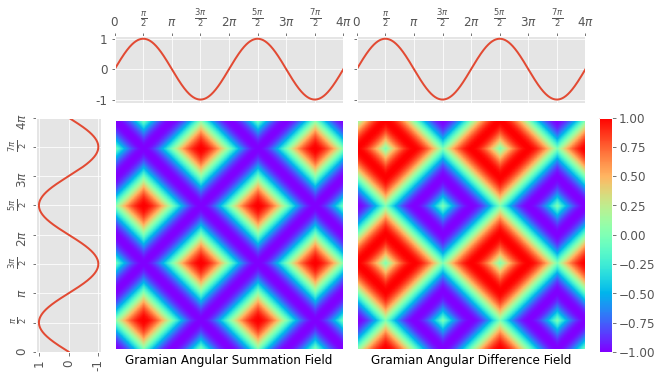

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

# Plot the time series and its recurrence plot
width_ratios = (2, 7, 7, 0.4)
height_ratios = (2, 7)
width = 10
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.1, hspace=0.1)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top1 = fig.add_subplot(gs[0, 1])
ax_top2 = fig.add_subplot(gs[0, 2])
for ax in (ax_top1, ax_top2):
    ax.plot(time_points, x)
    ax.set_xticks(time_ticks)
    ax.set_xticklabels(time_ticklabels)
    ax.set_yticks(value_ticks)
    ax.xaxis.tick_top()
    ax.set_xlim((0, 4 * np.pi))
ax_top1.set_yticklabels(value_ticks)
ax_top2.set_yticklabels([])

# Plot the Gramian angular fields on the bottom right
ax_gasf = fig.add_subplot(gs[1, 1])
ax_gasf.imshow(X_gasf[0], cmap='rainbow', origin='lower',
               extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gasf.set_xticks([])
ax_gasf.set_yticks([])
ax_gasf.set_title('Gramian Angular Summation Field', y=-0.09)

ax_gadf = fig.add_subplot(gs[1, 2])
im = ax_gadf.imshow(X_gadf[0], cmap='rainbow', origin='lower',
                    extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gadf.set_xticks([])
ax_gadf.set_yticks([])
ax_gadf.set_title('Gramian Angular Difference Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 3])
fig.colorbar(im, cax=ax_cbar)

plt.show()

### Single MTF

/var/folders/hj/4_1_bgn11_dgm99bq0lnjxl80000gn/T/ipykernel_11199/306434637.py:65: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=ax_cbar)


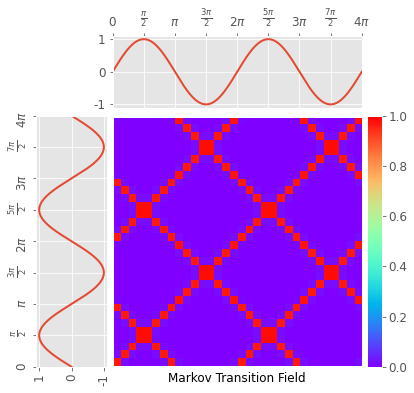

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

# Plot the time series and its Markov transition field
width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
width = 6
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()
ax_top.set_xlim((0, 4 * np.pi))
ax_top.set_yticklabels(value_ticks)

# Plot the Gramian angular fields on the bottom right
ax_mtf = fig.add_subplot(gs[1, 1])
im = ax_mtf.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.,
                   extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_mtf.set_xticks([])
ax_mtf.set_yticks([])
ax_mtf.set_title('Markov Transition Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)

plt.show()